# TOPSIS Implementation in Python

This notebook demonstrates the implementation of the TOPSIS
(Technique for Order Preference by Similarity to Ideal Solution)
method using Python for multi-criteria decision making.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data.csv")

weights = [1, 1, 1, 1, 1]
impacts = ['+', '+', '+', '+', '+']

data = df.iloc[:, 1:]

norm_data = data / np.sqrt((data ** 2).sum())
weighted_data = norm_data * weights

ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(weighted_data.iloc[:, i].max())
        ideal_worst.append(weighted_data.iloc[:, i].min())
    else:
        ideal_best.append(weighted_data.iloc[:, i].min())
        ideal_worst.append(weighted_data.iloc[:, i].max())

distance_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

df['Topsis Score'] = distance_worst / (distance_best + distance_worst)
df['Rank'] = df['Topsis Score'].rank(ascending=False).astype(int)

df

,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
0,M1,0.84,0.71,6.7,42.1,12.59,0.563692,3
1,M2,0.91,0.83,7.0,31.7,10.11,0.513032,4
2,M3,0.79,0.62,4.8,46.7,13.23,0.439177,6
3,M4,0.78,0.61,6.4,42.4,12.55,0.491956,5
4,M5,0.94,0.88,3.6,62.2,16.91,0.641886,2
5,M6,0.88,0.77,6.5,51.5,14.91,0.738148,1
6,M7,0.66,0.44,5.3,48.9,13.83,0.407390,8
7,M8,0.93,0.86,3.4,37.0,10.55,0.408499,7


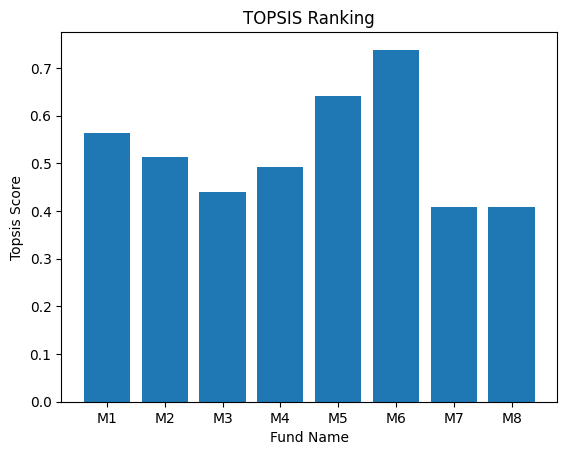

In [3]:
plt.figure()
plt.bar(df.iloc[:, 0], df['Topsis Score'])
plt.xlabel("Fund Name")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Ranking")
plt.show()